<a href="https://colab.research.google.com/github/rakibhasan3948/DataMining-MachineLearning/blob/main/0_1_SmokingAndDrinkingDatasetWithBodySignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**After implementing several algorithms on the smoking_driking_dataset_Ver01 I have got these following results-**

**Linnear Regression -**  
*   Smoker_Type = 0.37737678550554643
*   Drinker_Type = 0.37737678550554643

**Logistic Regression -**
*   Smoker_Type = 0.6769483538967078
*   Drinker_Type = 0.714241428482857

**K-Nearest Neighbor -**
*   Smoker_Type = 0.6459172918345837
*   Drinker_Type = 0.6705623411246823

**Naive Bayes -**
*   Smoker_Type = 0.6640833281666564
*   Drinker_Type = 0.6758323516647033

**Decision Tree -**
*   Smoker_Type = 0.6180172360344721
*   Drinker_Type = 0.6393452786905574

**K-Nearest Neighbor -**
*   Smoker_Type = 0.6884803769607539
*   Drinker_Type = 0.7273854547709095

# **Preprocessing**

In [3]:
import pandas as pd
df = pd.read_csv('/content/smoking_driking_dataset_Ver01.csv')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28456,Male,80,170,45,66.0,0.6,0.7,1.0,1.0,148.0,...,71.0,60.0,13.5,1.0,1.1,34.0,25.0,24.0,2.0,N
28457,Female,55,150,45,69.0,0.4,0.3,1.0,1.0,100.0,...,119.0,94.0,14.3,1.0,0.8,28.0,16.0,14.0,1.0,Y
28458,Male,50,165,65,85.2,1.0,0.1,1.0,1.0,120.0,...,127.0,349.0,15.9,1.0,1.0,20.0,12.0,52.0,3.0,Y
28459,Female,60,160,60,87.0,1.0,0.7,1.0,1.0,116.0,...,108.0,152.0,13.2,1.0,0.6,23.0,15.0,18.0,1.0,N


In [4]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         1
hear_left           1
hear_right          1
SBP                 1
DBP                 1
BLDS                1
tot_chole           1
HDL_chole           1
LDL_chole           1
triglyceride        1
hemoglobin          1
urine_protein       1
serum_creatinine    1
SGOT_AST            1
SGOT_ALT            1
gamma_GTP           1
SMK_stat_type_cd    1
DRK_YN              1
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()
df.DRK_YN = le.fit_transform(df.DRK_YN)
df.sex = le.fit_transform(df.sex)

In [8]:
df.DRK_YN.unique()

array([1, 0])

In [9]:
df.DRK_YN.value_counts()

1    14245
0    14215
Name: DRK_YN, dtype: int64

In [10]:
df.SMK_stat_type_cd.unique()

array([1., 3., 2.])

In [11]:
df.SMK_stat_type_cd = df.SMK_stat_type_cd.astype(int)

In [12]:
df.SMK_stat_type_cd.unique()

array([1, 3, 2])

In [13]:
df.SMK_stat_type_cd.value_counts()

1    17210
3     6229
2     5021
Name: SMK_stat_type_cd, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])

<ipython-input-14-128d76b7958e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0:22] = mms.fit_transform(df.iloc[:,0:22])


In [15]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,0.230769,0.636364,0.45,0.057054,0.091837,0.091837,0.0,0.0,0.290323,...,0.024424,0.009590,0.774648,0.0,0.039301,0.019544,0.014304,0.038114,1,1
1,1.0,0.153846,0.818182,0.50,0.056017,0.081633,0.112245,0.0,0.0,0.354839,...,0.028722,0.012646,0.683099,0.0,0.034934,0.018458,0.014738,0.025075,3,0
2,1.0,0.307692,0.545455,0.45,0.058091,0.112245,0.142857,0.0,0.0,0.290323,...,0.014263,0.010855,0.683099,0.0,0.034934,0.047774,0.013004,0.066199,1,0
3,1.0,0.461538,0.727273,0.50,0.058091,0.142857,0.112245,0.0,0.0,0.451613,...,0.020125,0.011065,0.809859,0.0,0.043668,0.028230,0.013871,0.016048,1,0
4,1.0,0.461538,0.545455,0.30,0.046680,0.091837,0.112245,0.0,0.0,0.406452,...,0.022665,0.010855,0.542254,0.0,0.030568,0.017372,0.004335,0.023069,1,0


# **Principal Component Analysis**

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
principal_components = pca.fit_transform(df.iloc[:,0:22])

# **Visualization**

In [99]:
import seaborn as srn

<Axes: >

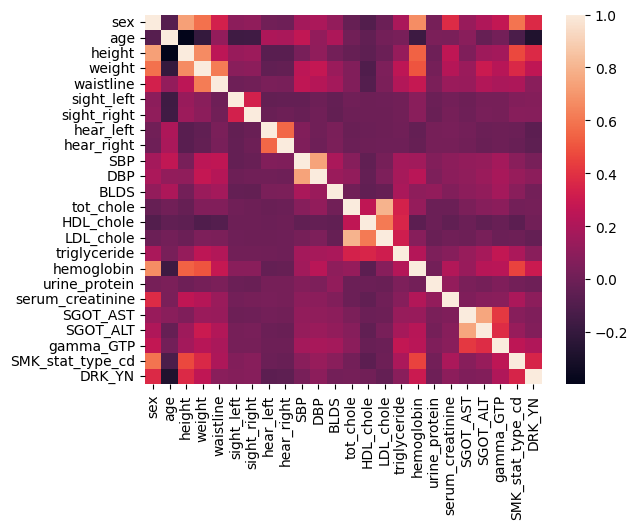

In [100]:
srn.heatmap(df.iloc[::].corr())

In [101]:
import matplotlib.pyplot as plt

# **LinearRegression**

**Smoker_Type**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [103]:
x = principal_components
y = df.SMK_stat_type_cd

In [104]:
#x.head()

In [105]:
y.head()

0    1
1    3
2    1
3    1
4    1
Name: SMK_stat_type_cd, dtype: int64

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [107]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.3630891597928605

In [108]:
lr.predict(x_test)

array([1.17230785, 2.1721341 , 0.91827587, ..., 1.15864961, 2.15298477,
       2.093404  ])

**Dinker_Type**

In [109]:
x = principal_components
y = df.DRK_YN

In [110]:
#x.head()

In [111]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [113]:
lr = LinearRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.21984143454668392

In [114]:
lr.predict(x_test)

array([0.40796669, 0.71725871, 0.15027052, ..., 0.50921218, 0.80180885,
       0.70639756])

# **LogisticRegression**

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
x = principal_components
y = df.SMK_stat_type_cd

In [117]:
#x.head()

In [118]:
y.head()

0    1
1    3
2    1
3    1
4    1
Name: SMK_stat_type_cd, dtype: int64

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [120]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.6647926914968376

In [121]:
lr.predict(x_test)

array([1, 3, 1, ..., 1, 3, 3])

**Dinker_Type**

In [122]:
x = principal_components
y = df.DRK_YN

In [123]:
x

array([[-5.34190897e-01, -1.62298257e-01,  6.32467060e-02, ...,
        -9.31797669e-03, -2.17794451e-02, -9.68937913e-03],
       [-5.80616394e-01, -2.53127743e-01,  1.26743401e-01, ...,
        -2.65367985e-02,  2.73332868e-04,  2.09342357e-02],
       [-4.92562327e-01, -8.68756627e-02,  1.39842142e-02, ...,
         4.89226984e-03,  3.81430432e-02, -4.16643277e-02],
       ...,
       [ 5.99685686e-01,  4.69109243e-02, -8.49943688e-02, ...,
         1.34977339e-02, -5.43487142e-02,  5.88072070e-03],
       [-4.70966019e-01,  4.98208021e-02, -8.44910567e-02, ...,
         1.84257062e-02, -5.37866217e-02,  2.18369298e-02],
       [ 5.43759038e-01,  6.36765174e-02, -9.57938511e-02, ...,
        -1.19737367e-03,  1.73825753e-02,  9.95280199e-03]])

In [124]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [126]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.7067814476458187

In [127]:
lr.predict(x_test)

array([0, 1, 0, ..., 1, 1, 1])

# **K_Nearest_NeighborsClassifier**

**Smoker_Type**

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
x = principal_components
y = df.SMK_stat_type_cd

In [130]:
#x.head()

In [131]:
y.head()

0    1
1    3
2    1
3    1
4    1
Name: SMK_stat_type_cd, dtype: int64

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [133]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6477512297962053

In [134]:
knn.predict(x_test)

array([1, 2, 1, ..., 1, 3, 2])

**Drinker_Type**

In [135]:
x = principal_components
y = df.DRK_YN

In [136]:
#x.head()

In [137]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [139]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6579409697821503

In [140]:
knn.predict(x_test)

array([0, 0, 0, ..., 1, 1, 0])

# **NaiveBayes**

**Smoker_Type**

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
x = principal_components
y = df.SMK_stat_type_cd

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [144]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6540758959943781

In [145]:
nb.predict(x_test)

array([1, 3, 1, ..., 1, 3, 3])

**Drinker_Type**

In [146]:
x = principal_components
y = df.DRK_YN

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [148]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6695361911454674

In [149]:
nb.predict(x_test)

array([1, 1, 0, ..., 1, 1, 1])

# **Decision_Tree**

**Smoker_Type**

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
x = principal_components
y = df.SMK_stat_type_cd

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [153]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6059381588193956

In [154]:
dt.predict(x_test)

array([1, 3, 1, ..., 1, 3, 3])

**Drinker_Type**

In [155]:
x = principal_components
y = df.DRK_YN

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [157]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6136683063949403

In [158]:
dt.predict(x_test)

array([0, 1, 0, ..., 1, 1, 1])

# **Randomforest**

**Smoker_Type**

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
x = principal_components
y = df.SMK_stat_type_cd

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [162]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.66865776528461

In [163]:
rf.predict(x_test)

array([1, 3, 1, ..., 1, 3, 3])

**Drinker_Type**

In [164]:
x = principal_components
y = df.DRK_YN

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [166]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.6999297259311315

In [167]:
rf.predict(x_test)

array([1, 1, 0, ..., 1, 1, 1])

# **Trying Ensemble Method**
**Boosting**

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
x = principal_components
y = df.SMK_stat_type_cd

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [90]:
gbr = GradientBoostingRegressor()

In [91]:
gbr = gbr.fit(x_train, y_train)

In [96]:
pred_final = gbr.predict(x_test)

In [97]:
print(mean_squared_error(y_test, pred_final))

0.42981618688241047
